In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [62]:
df = pd.read_csv("finalDataset1.csv", parse_dates=['date'],index_col=3)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2020-01-22 to 2020-09-17
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       238 non-null    int64  
 1   country     238 non-null    object 
 2   sub-region  238 non-null    object 
 3   driving     238 non-null    float64
 4   transit     0 non-null      float64
 5   walking     238 non-null    float64
 6   Confirmed   238 non-null    int64  
 7   Deaths      238 non-null    int64  
 8   Recovered   238 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 18.6+ KB


In [63]:
print("Min:",df.index.min())
print("Max:",df.index.max())

Min: 2020-01-22 00:00:00
Max: 2020-09-17 00:00:00


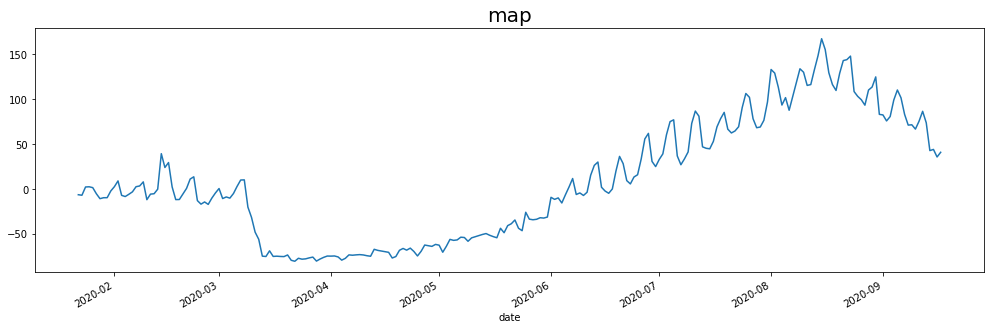

In [74]:
plt.figure(figsize=(17,5))
df.driving.plot()
plt.title("map",fontsize=20)
plt.show()

In [65]:
#helper function to plot the stock prediction
stock_price=df
prev_values = stock_price.iloc[:179]
y_test = stock_price.iloc[180:]

def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

In [66]:
df[df.index.duplicated()]

,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
date,,,,,,,,,


In [80]:
y_av = pd.Series(np.repeat(prev_values.mean(),68),index=y_test.index)
mse(y_av,y_test)

ValueError: cannot reindex from a duplicate axis

In [70]:
y_train = stock_price[80:180]
y_test = stock_price[180:]
print("y train:",y_train.shape,"\ny test:",y_test.shape)

y train: (100, 9) 
y test: (58, 9)


In [73]:
X_train = pd.DataFrame([list(df[i:i+80]) for i in range(100)],
                       columns=range(9,0,-1),index=y_train.index)
X_test = pd.DataFrame([list(df[i:i+80]) for i in range(100,158)],
                       columns=range(9,0,-1),index=y_test.index)
X_train

,9,8,7,6,5,4,3,2,1
date,,,,,,,,,
2020-04-11,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
2020-04-12,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
2020-04-13,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
2020-04-14,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
2020-04-15,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
...,...,...,...,...,...,...,...,...,...
2020-07-17,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
2020-07-18,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
2020-07-19,index,country,sub-region,driving,transit,walking,Confirmed,Deaths,Recovered
